# EDL implemented in Keras

This is an implementation in Keras of the 

The paper can be accesed over http://arxiv.org/abs/1806.01768

The notebook can be accesed over https://muratsensoy.github.io/uncertainty.ipynb

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Plain Vanilla NN on MNIST

In [0]:


batch_size = 1000
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.5555 - accuracy: 0.8312 - val_loss: 0.1431 - val_accuracy: 0.9571
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.1574 - accuracy: 0.9542 - val_loss: 0.0679 - val_accuracy: 0.9792
Epoch 3/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.1024 - accuracy: 0.9700 - val_loss: 0.0493 - val_accuracy: 0.9842
Epoch 4/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 5/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0366 - val_accuracy: 0.9872
Epoch 6/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 7/50
60000/60000 [==============================] - 5s 81us/st

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def rotate_img(x, deg):
    import scipy.ndimage as nd
    return nd.rotate(x.reshape(28,28),deg,reshape=False).ravel()

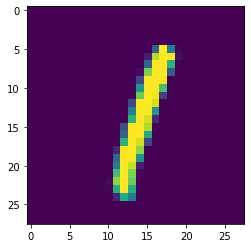

In [0]:
digit_one = x_test[5]
plt.imshow(digit_one.reshape(28,28)) 
plt.show()

In [0]:
model.predict(digit_one.reshape(1, 28,28,1))

array([[3.3381246e-13, 1.0000000e+00, 1.2620004e-12, 7.5564590e-17,
        2.0263545e-10, 3.0437174e-14, 3.9960196e-13, 3.4197443e-09,
        1.9552545e-12, 1.1285548e-14]], dtype=float32)

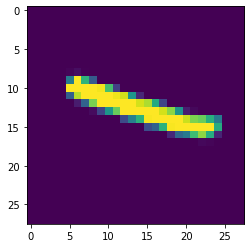

In [0]:
plt.imshow(rotate_img(digit_one, 90).reshape(28,28))

In [0]:
model.predict(rotate_img(digit_one, 90).reshape(1, 28,28,1))

array([[4.26818346e-12, 4.66139405e-10, 6.74091268e-07, 1.23609984e-08,
        1.67350254e-06, 3.42739168e-06, 4.87541344e-12, 9.99993920e-01,
        2.40558535e-07, 2.46898584e-13]], dtype=float32)

In [0]:
np.argmax(model.predict(rotate_img(digit_one, 90).reshape(1, 28,28,1)))

7

In [0]:
pred = []
for degree in np.arange(0, 180, 10):
    pred.append(np.argmax(model.predict(rotate_img(digit_one, degree).reshape(1, 28,28,1))))

print(pred)

[1, 1, 1, 1, 1, 1, 5, 5, 7, 7, 7, 7, 7, 5, 1, 1, 1, 1]


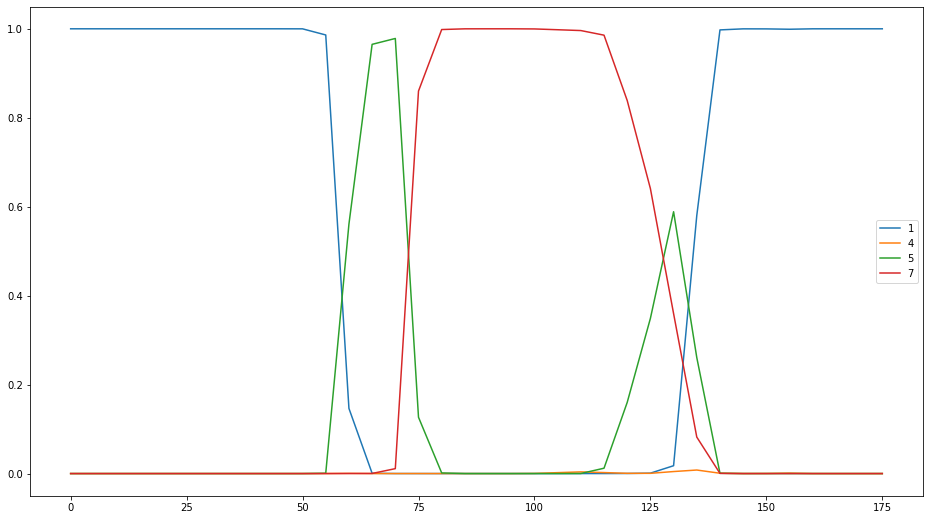

In [0]:
pred_one = []
pred_five = []
pred_seven = []
pred_four = []

_x = np.arange(0, 180, 5)

for degree in _x:
    vs = model.predict(rotate_img(digit_one, degree).reshape(1, 28,28,1))[0]
    pred_one.append(vs[1])
    pred_four.append(vs[4])
    pred_five.append(vs[5])
    pred_seven.append(vs[7])

plt.figure(figsize=(16,9))
plt.plot(_x, pred_one, label='1')
plt.plot(_x, pred_four, label='4')
plt.plot(_x, pred_five, label='5')
plt.plot(_x, pred_seven, label='7')
plt.legend()

## EDL

In [0]:
model_edl = Sequential()
model_edl.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_edl.add(Conv2D(64, (3, 3), activation='relu'))
model_edl.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model_edl.add(Flatten())
model_edl.add(Dense(128, activation='relu', bias_regularizer=keras.regularizers.l2(l=0.005), kernel_regularizer=keras.regularizers.l2(l=0.005)))
model_edl.add(Dropout(0.25))
# note the change of activation
model_edl.add(Dense(num_classes, activation='relu', bias_regularizer=keras.regularizers.l2(l=0.005), kernel_regularizer=keras.regularizers.l2(l=0.005)))

In [0]:
import keras.backend as K
import tensorflow as tf


def KL(alpha):
    beta=K.constant(np.ones((1,10)),dtype="float32")
    S_alpha = K.sum(alpha,axis=1,keepdims=True)
    S_beta = K.sum(beta,axis=1,keepdims=True)
    lnB = tf.math.lgamma(S_alpha) - K.sum(tf.math.lgamma(alpha),axis=1,keepdims=True)
    lnB_uni = K.sum(tf.math.lgamma(beta),axis=1,keepdims=True) - tf.math.lgamma(S_beta)
    
    dg0 = tf.math.digamma(S_alpha)
    dg1 = tf.math.digamma(alpha)
    
    return K.sum((alpha - beta)*(dg1-dg0),axis=1,keepdims=True) + lnB + lnB_uni

def mse_loss(yTrue,yPred):
    alpha = yPred + 1
    S = K.sum(alpha, axis=1, keepdims=True)
    m = alpha / S
    A = K.sum((yTrue-m)**2, axis=1, keepdims=True)
    B = K.sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True)

    # ep is a global variable that contains the number of the epoch
    ll = min(1.0, float(ep)/float(6))
    
    alp = yPred*(1-yTrue) + 1 
    C =  ll * KL(alp)

    return A + B + C

In [0]:
def edl_accuracy(yTrue, yPred):
    pred = K.argmax(yPred, axis=1)
    truth = K.argmax(yTrue, axis=1)
    match = K.reshape(K.cast(K.equal(pred, truth), "float32"),(-1,1))
    return K.mean(match)


In [0]:
from keras.callbacks import Callback

ep = 1

class GetEpochs(Callback):
    def on_epoch_end(self, epoch, logs={}):
        global ep
        ep += 1


model_edl.compile(loss=mse_loss,
              optimizer=keras.optimizers.Adam(),
              metrics=[edl_accuracy])


In [0]:
model_edl.predict(digit_one.reshape(1, 28,28,1))

array([[0.02068036, 0.        , 0.        , 0.        , 0.00097928,
        0.05629957, 0.        , 0.        , 0.        , 0.01528445]],
      dtype=float32)

In [0]:
mse_loss(y_test[0], model_edl.predict(digit_one.reshape(1, 28,28,1)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.98343]], dtype=float32)>

Load model and weights

In [0]:
!wget -O model.json https://drive.google.com/u/1/uc?id=1FoDjZAISiPuiG5zGYYVkcTcnYUV8bons&export=download
!wget -O model.h5 https://drive.google.com/u/1/uc?id=1D_-CX2znCxRITy5e6aXD1cFPYfUIYE-R&export=download

--2020-05-23 13:09:37--  https://drive.google.com/u/1/uc?id=1FoDjZAISiPuiG5zGYYVkcTcnYUV8bons
Resolving drive.google.com (drive.google.com)... 74.125.201.113, 74.125.201.138, 74.125.201.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b1v0qfuq3culhcjt4t7b7ck9f0v4aiae/1590239325000/05236606107795315109/*/1FoDjZAISiPuiG5zGYYVkcTcnYUV8bons [following]
--2020-05-23 13:09:38--  https://doc-0k-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b1v0qfuq3culhcjt4t7b7ck9f0v4aiae/1590239325000/05236606107795315109/*/1FoDjZAISiPuiG5zGYYVkcTcnYUV8bons
Resolving doc-0k-1k-docs.googleusercontent.com (doc-0k-1k-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to doc-0k-1k-docs.googleusercontent.com (doc-0k-1k-docs.googleusercontent.com)|74

In [0]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

loaded_model.compile(loss=mse_loss,
              optimizer=keras.optimizers.Adam(),
              metrics=[edl_accuracy])


# # #To train from scratch # change the selector below accordingly
# model_edl.fit(x_train, y_train,
#            batch_size=1000,
#            epochs=50,
#            verbose=1,
#            validation_data=(x_test, y_test),
#            callbacks=[GetEpochs(),])

In [0]:
# # #To save the model
# model_json = model_edl.to_json()
# with open("mnist_edl.json", "w") as json_file:
#     json_file.write(model_json)

# model_edl.save_weights("mnist_edl_weights.h5")

**SELECTOR ON WHETHER TO USE THE LOADED_MODEL OR THE TRAINED MODEL_EDL**

In [0]:
# #To use the model trained from scratch
# medl = model_edl
medl = loaded_model

In [0]:
medl.predict(digit_one.reshape(1, 28,28,1))

array([[ 0.      , 88.432785,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ]], dtype=float32)

In [0]:
from scipy.stats import dirichlet

def img_to_dirichlet(img, nn=medl):
    _ev = nn.predict(img.reshape(1, 28,28,1))
    alpha = _ev.reshape(10,)+1
    S = np.sum(alpha)
    K = 10.0
    return dirichlet.mean(alpha), K/S

In [0]:
img_to_dirichlet(digit_one)

(array([0.01015922, 0.9085671 , 0.01015922, 0.01015922, 0.01015922,
        0.01015922, 0.01015922, 0.01015922, 0.01015922, 0.01015922],
       dtype=float32), 0.10159216765559982)

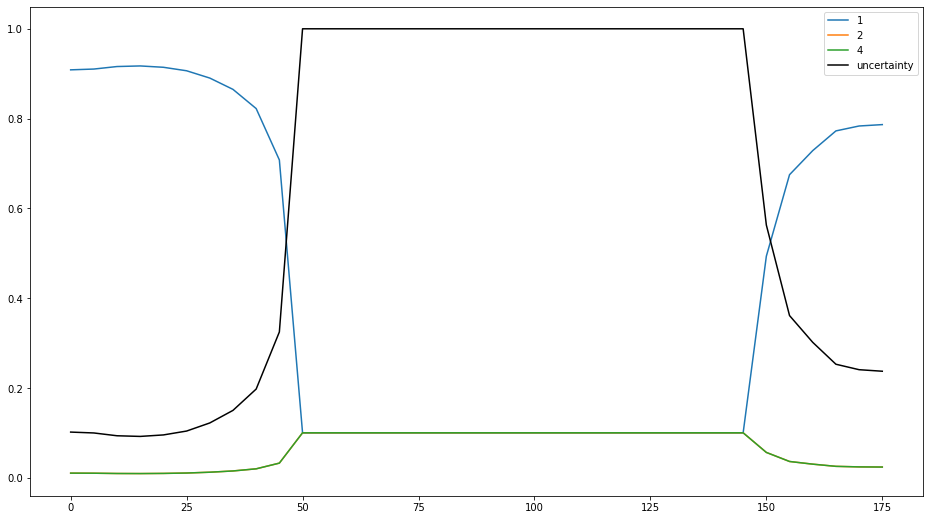

In [0]:
pred_one = []
pred_u = []
pred_seven = []
pred_five = []
pred_four = []
pred_zero = []
pred_two = []

_x = np.arange(0, 180, 5)

for degree in _x:
    m, u = img_to_dirichlet(rotate_img(digit_one, degree))
    pred_one.append(m[1])
    pred_seven.append(m[7])
    pred_five.append(m[5])
    pred_four.append(m[4])
    pred_zero.append(m[0])
    pred_two.append(m[2])
    pred_u.append(u)

plt.figure(figsize=(16,9))
#plt.plot(_x, pred_zero, label='0')
plt.plot(_x, pred_one, label='1')
plt.plot(_x, pred_two, label='2')
plt.plot(_x, pred_four, label='4')
#plt.plot(_x, pred_five, label='5')
#plt.plot(_x, pred_seven, label='7')
plt.plot(_x, pred_u, label='uncertainty', c='k')
plt.legend()